Alright... lets get started

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv("tiktok_dataset.csv")

Let's look at few rows of our dataset

In [160]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


There are few nulls and they happen to be in claim_status. So, we need to drop them

In [162]:
df = df.dropna(axis=0)

Lets check for duplicated data in video_id column

In [163]:
duplicates = df['video_id'].duplicated()
duplicated_rows = df[duplicates]
duplicated_rows

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


No video is repeated

In [164]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Let's inspect the column distribution and check for the outliers. We will go one-by-one

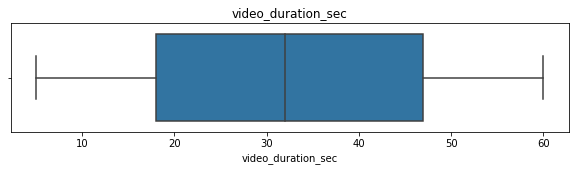

In [165]:
#video duration
plt.figure(figsize=(10,2))
plt.title('video_duration_sec')
sns.boxplot(x=df['video_duration_sec']);

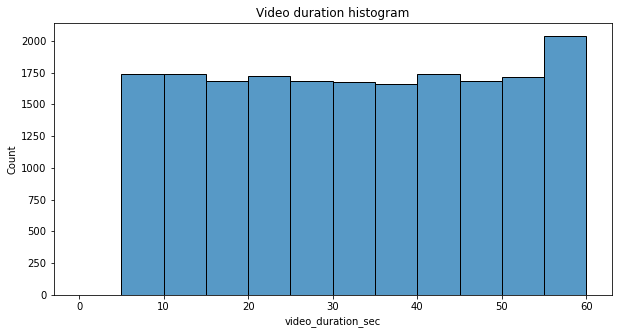

In [166]:
plt.figure(figsize=(10,5))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

All videos are 5-60 seconds in length, and the distribution is almost uniform.

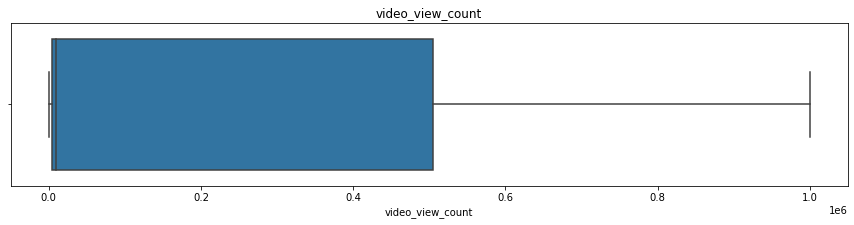

In [167]:
#Video views
plt.figure(figsize=(15, 3))
plt.title('video_view_count')
sns.boxplot(x=df['video_view_count']);

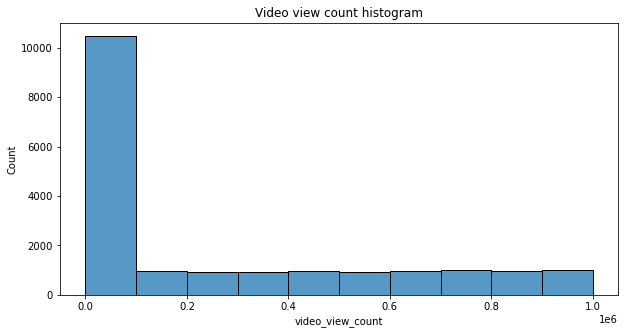

In [168]:
plt.figure(figsize=(10,5))
sns.histplot(df['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

This column has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

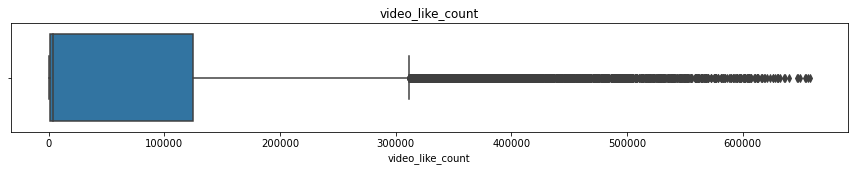

In [169]:
#Video likes
plt.figure(figsize=(15,2))
plt.title('video_like_count')
sns.boxplot(x=df['video_like_count']);

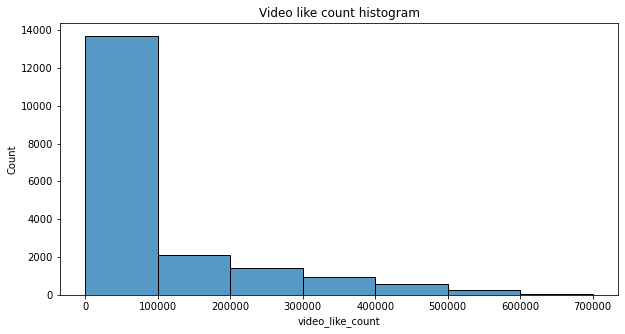

In [170]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Video like count histogram');

We observed outliers. They are needed to be handled.

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

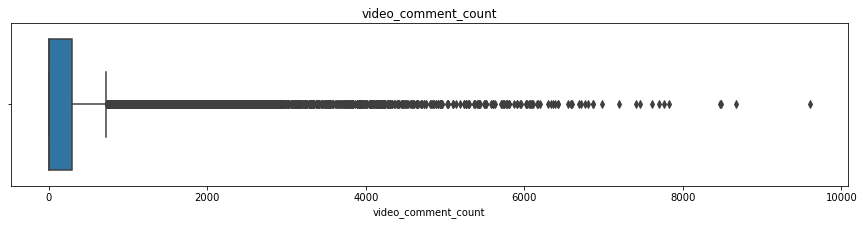

In [171]:
plt.figure(figsize=(15,3))
plt.title('video_comment_count')
sns.boxplot(x=df['video_comment_count']);

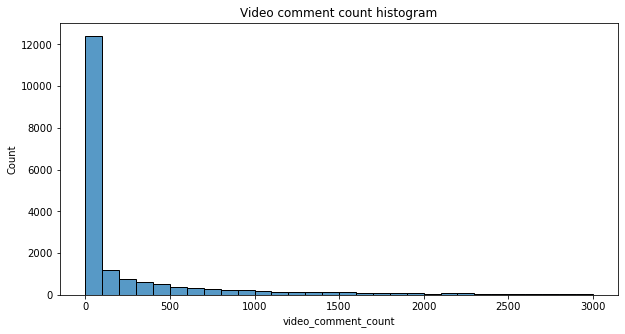

In [172]:
plt.figure(figsize=(10,5))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

We observed outliers.

Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

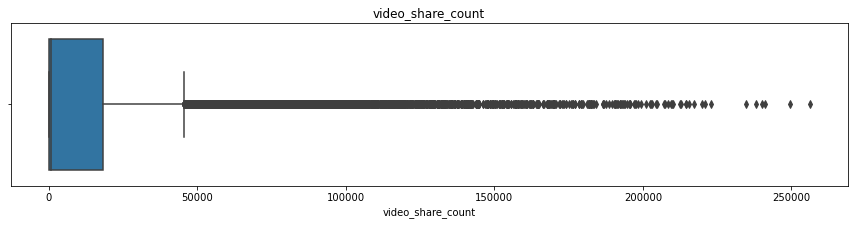

In [173]:
#Video shares
plt.figure(figsize=(15,3))
plt.title('video_share_count')
sns.boxplot(x=df['video_share_count']);

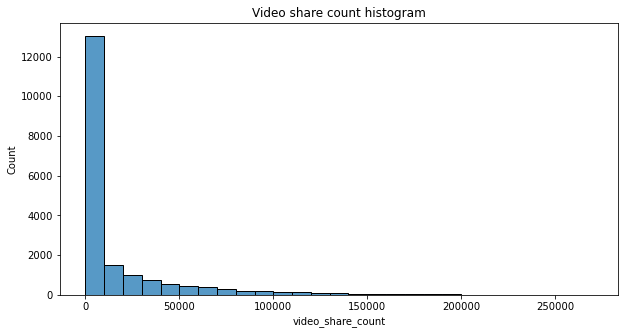

In [174]:
plt.figure(figsize=(10,5))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

Outliers are observed.

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

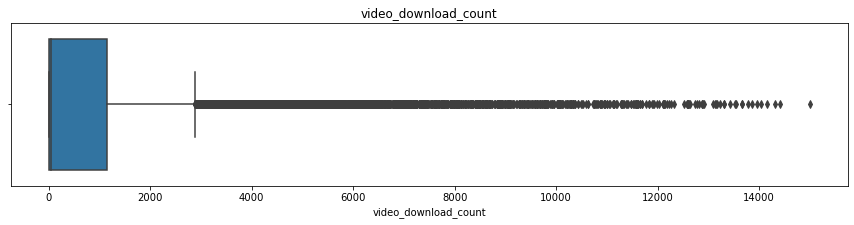

In [175]:
#Video downloads
plt.figure(figsize=(15,3))
plt.title('video_download_count')
sns.boxplot(x=df['video_download_count']);

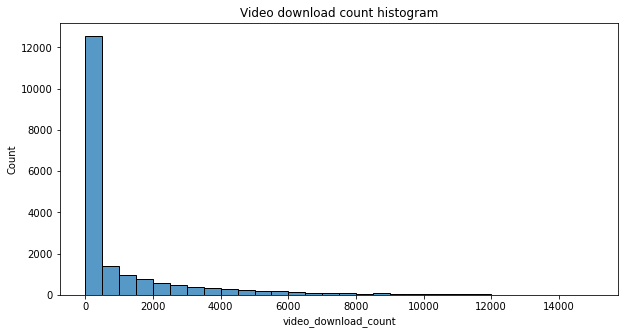

In [176]:
plt.figure(figsize=(10,5))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

Outliers are observed.

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

Lets handle outliers now

In [177]:
#No. of outliers

count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outlier_threshold = q3 + 1.5*iqr

    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 0
Number of outliers, video_like_count: 1726
Number of outliers, video_share_count: 2508
Number of outliers, video_download_count: 2450
Number of outliers, video_comment_count: 2789


In [178]:
def cap_outliers(df, column_name):

    # Calculate the 25th and 75th percentiles (Q1 and Q3)
    percentile25 = df[column_name].quantile(0.25)
    percentile75 = df[column_name].quantile(0.75)

    # Calculate the IQR
    iqr = percentile75 - percentile25

    # Determine the upper limit for outliers
    upper_limit = percentile75 + 1.5* iqr

    # Cap the outliers
    df.loc[df[column_name] > upper_limit, column_name] = upper_limit
    print(f"Outliers in '{column_name}' have been capped.")
    return df

In [179]:
df = cap_outliers(df, 'video_like_count')
df = cap_outliers(df, 'video_share_count')
df = cap_outliers(df, 'video_download_count')
df = cap_outliers(df, 'video_comment_count')

Outliers in 'video_like_count' have been capped.
Outliers in 'video_share_count' have been capped.
Outliers in 'video_download_count' have been capped.
Outliers in 'video_comment_count' have been capped.


In [180]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = q3 + 1.5*iqr

    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 0
Number of outliers, video_like_count: 0
Number of outliers, video_share_count: 0
Number of outliers, video_download_count: 0
Number of outliers, video_comment_count: 0


Alright, outliers have been capped and it is confirmed

In [181]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,74323.538632,11246.910082,713.444836,181.023501
std,5509.220604,2.537030e+09,16.226470,322893.280814,107103.555220,16573.533466,1049.881393,272.084766
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,311333.875000,45382.500000,2880.125000,728.500000


As we are predicting whether a given video is claim or it provides opinion, it is important to look if the dataset is balanced in this aspect.

In [182]:
df["claim_status"].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

Yes, the dataset is very much balanced.

Now let's see this dataset more deeply.

In [183]:
#Calculating video_transcription_text length

df['text_length'] = df['video_transcription_text'].str.len()
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


As we have created this new column, lets analyze this.

In [184]:
df[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


On an average, claims text are much larger than opinions and that is making sense (iykyk).

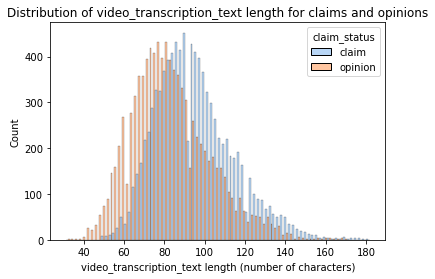

In [185]:
#Lets deep-dive more

sns.histplot(data=df, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

The distribution of text lengths for both the categories is differentiated by a shift. More videos with opinion label are shorter in video transcription text

Now, let's see what the 'video transcription text' column brings to us. We will analyze this now

In [186]:
#basic NLP related imports

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [187]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\apraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\apraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [188]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

In [189]:
df['clean_text'] = df['video_transcription_text'].apply(clean_text)

Text preprocessing has been done, Lets now see the dataframe, again.

In [190]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,clean_text
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,someone shared drone delivery already happenin...
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,someone shared microorganism one teaspoon soil...
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,someone shared american industrialist andrew c...
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131,someone shared metro st petersburg average dep...
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128,someone shared number business allowing employ...


Let's create a wordcloud for claims and opinion videos separately to see most frequent words.

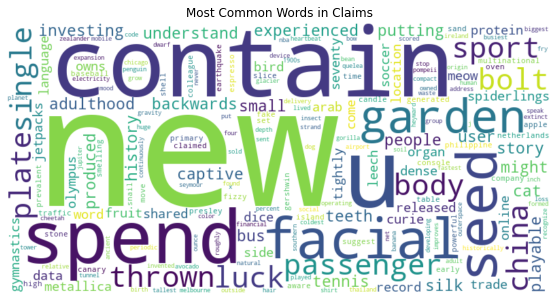

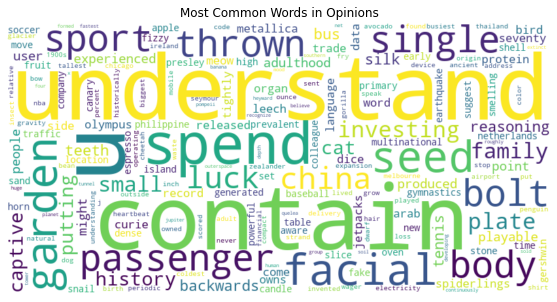

In [191]:
from wordcloud import WordCloud

# Create a single string of words for each category
claims_text = " ".join(claims_text.split())  # Ensure unique words
opinions_text = " ".join(opinions_text.split())

# Generate word cloud for Claims
plt.figure(figsize=(10, 5))
wc_claim = WordCloud(width=800, height=400, background_color="white").generate(claims_text)
plt.imshow(wc_claim, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Claims")
plt.show()

# Generate word cloud for Opinions
plt.figure(figsize=(10, 5))
wc_opinion = WordCloud(width=800, height=400, background_color="white").generate(opinions_text)
plt.imshow(wc_opinion, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Opinions")
plt.show()

In [192]:
#summary statistics for text length

text_stats = df.groupby('claim_status')['text_length'].describe()
text_stats

,count,mean,std,min,25%,50%,75%,max
claim_status,,,,,,,,
claim,9608.0,95.376978,19.600811,49.0,82.0,93.0,107.0,182.0
opinion,9476.0,82.722562,19.782014,31.0,69.0,80.0,94.0,169.0


In [193]:
# to see all the columns

pd.set_option('display.max_columns', None)  

In [194]:
# Engagement metrics for each category

engagement_cols = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
engagement_stats = df.groupby('claim_status')[engagement_cols].describe()
engagement_stats

video_view_count                                        \
                        count           mean            std     min   
claim_status                                                          
claim                  9608.0  501029.452748  291349.239825  1049.0   
opinion                9476.0    4956.432250    2885.907219    20.0   

                                                       video_like_count  \
                    25%       50%        75%       max            count   
claim_status                                                              
claim         247003.75  501555.0  753088.00  999817.0           9608.0   
opinion         2467.00    4953.0    7447.25    9998.0           9476.0   

                                                                     \
                       mean            std  min       25%       50%   
claim_status                                                          
claim         146548.262203  110808.066423  0.0  43436.75  123649.0   
opinion         1092.729844     964.099816  0.0    289.00     823.0   

                                    video_share_count                \
                    75%         max             count          mean   
claim_status                                                          
claim         255715.25  311333.875            9608.0  22125.141549   
opinion         1664.00    4375.000            9476.0    217.145631   

                                                                     \
                       std  min      25%      50%      75%      max   
claim_status                                                          
claim         17527.426116  0.0  5062.25  17997.5  45382.5  45382.5   
opinion         252.269583  0.0    34.00    121.0    314.0   1674.0   

             video_download_count                                        \
                            count        mean          std  min     25%   
claim_status                                                              
claim                      9608.0  1403.59859  1108.987646  0.0  324.75   
opinion                    9476.0    13.67729    16.200652  0.0    2.00   

                                         video_comment_count              \
                 50%       75%       max               count        mean   
claim_status                                                               
claim         1139.5  2880.125  2880.125              9608.0  356.899615   
opinion          7.0    19.000   101.000              9476.0    2.697446   

                                                          
                     std  min   25%    50%    75%    max  
claim_status                                              
claim         291.087780  0.0  68.0  286.0  728.5  728.5  
opinion         4.089288  0.0   0.0    1.0    3.0   32.0

Claim videos have a much higher video view count, likes, shares, downloads, and comments compared to opinion videos.

The mean view count for claim videos (501K) is 100x higher than that of opinion videos (4.9K), indicating that claim-based videos attract more attention.

The standard deviation (std) is much larger for claim videos, indicating that their engagement varies widely across different videos.

Opinion videos have a lower spread, suggesting a more consistent but lower level of engagement.

Shares and downloads are also much higher for claim videos, further supporting the idea that claim-based content spreads more widely.

The higher number of comments on claim videos suggests that such content is more controversial, engaging, or discussion-provoking.


Now, let's check these claims whether they are statistically significant or not. Ttests and Cohen's d test are chosen

In [195]:
from scipy.stats import ttest_ind

# Define claim and opinion subsets
claims = df[df['claim_status'] == 'claim']
opinions = df[df['claim_status'] == 'opinion']

# List of numerical columns to test
metrics = ['text_length', 'video_view_count', 'video_like_count', 
           'video_share_count', 'video_download_count', 'video_comment_count']

# Function for t-test and Cohen's d
def perform_tests(metric):
    t_stat, p_value = ttest_ind(claims[metric], opinions[metric], equal_var=False)
    mean_diff = claims[metric].mean() - opinions[metric].mean()
    pooled_std = np.sqrt((claims[metric].std()**2 + opinions[metric].std()**2) / 2)
    cohens_d = mean_diff / pooled_std
    
    return {
        "Metric": metric,
        "T-Statistic": t_stat,
        "P-Value": p_value,
        "Cohen's d": cohens_d
    }

# Run tests for all metrics
results = [perform_tests(metric) for metric in metrics]

# Convert to DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Metric  T-Statistic  P-Value  Cohen's d
0           text_length    44.385499      0.0   0.642629
1      video_view_count   166.888578      0.0   2.407828
2      video_like_count   128.664489      0.0   1.856340
3     video_share_count   122.505447      0.0   1.767480
4  video_download_count   122.838079      0.0   1.772279
5   video_comment_count   119.261507      0.0   1.720677


All p-values = 0.0, meaning every engagement metric is significantly different between claim and opinion videos.

This confirms that claim videos and opinion videos do not have the same engagement patterns.

Cohen’s d > 0.5 is considered a large effect—it indicates that the difference between the two groups is meaningful, not just statistically significant.

Insights from Effect Sizes:

Video View Count (2.41) → Very large effect (Claim videos get significantly more views).

Video Like Count (1.86) → Large effect (Claim videos receive way more likes).

Video Share Count (1.77) → Large effect (Claim videos are shared far more).

Video Download Count (1.77) → Large effect (Claim videos get downloaded more).

Video Comment Count (1.72) → Large effect (Claim videos generate more discussions).

Text Length (0.64) → Large effect (Claim videos tend to have longer transcriptions).

We are almost there in completing the analysis. For numerical and text columns, it is completed. Now, it is time to analyze categorical columns

In [205]:
verified_counts = df.groupby(["claim_status", "verified_status"]).size().unstack()
verified_counts

verified_status,not verified,verified
claim_status,,
claim,9399,209
opinion,8485,991


In [211]:
verified_percent = verified_counts.div(verified_counts.sum(axis=0), axis=1) * 100
verified_percent

verified_status,not verified,verified
claim_status,,
claim,52.555357,17.416667
opinion,47.444643,82.583333


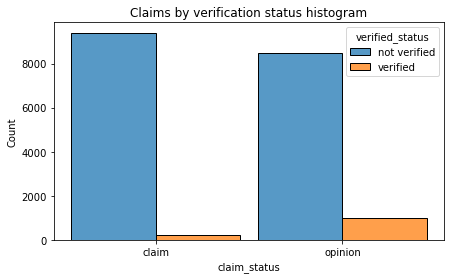

In [209]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

In [207]:
# Group and count values for claim_status vs. author_ban_status
ban_counts = df.groupby(["claim_status", "author_ban_status"]).size().unstack()
print("Author Ban Status Distribution by Claim Status")
ban_counts

Author Ban Status Distribution by Claim Status


author_ban_status,active,banned,under review
claim_status,,,
claim,6566,1439,1603
opinion,8817,196,463


In [212]:
ban_percent = ban_counts.div(ban_counts.sum(axis=0), axis=1) * 100
ban_percent

author_ban_status,active,banned,under review
claim_status,,,
claim,42.683482,88.012232,77.589545
opinion,57.316518,11.987768,22.410455


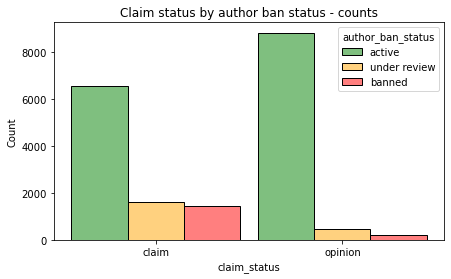

In [210]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

Now, we have made two claims based on data...

if a user is verified, they are much more likely to post opinions.

authors who post claim videos are more likely to come under review and/or get banned.

We will now test these claims

In [216]:
# Step 1: Create the contingency table from DataFrame
contingency_table = df.groupby(["claim_status", "verified_status"]).size().unstack()

# Extract values from the table
claim_unverified = contingency_table.loc["claim", "not verified"]
claim_verified = contingency_table.loc["claim", "verified"]
opinion_unverified = contingency_table.loc["opinion", "not verified"]
opinion_verified = contingency_table.loc["opinion", "verified"]

# Step 4: Print results
print(f"Odds Ratio: {odds_ratio:.4f}")

Odds Ratio: 5.2524


Verified users are 5.25 times more likely to post opinions than unverified users.

Since OR > 1, verified users strongly favor posting opinions over claims.


In [213]:
from scipy.stats import chi2_contingency
contingency_table = df.groupby(["claim_status", "verified_status"]).size().unstack()
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 554.0241
P-Value: 0.0000
Degrees of Freedom: 1


As p-value is very small, verified_status and claim_status are not independent— verified status does impact whether a user posts a claim or an opinion. The relationship is statistically significant

In [222]:

contingency_table_temp = pd.DataFrame({
    "banned": [1439, 196],  # [claims, opinions]
    "not_banned": [6566 + 1603, 8817 + 463]  # Combining active & under review
}, index=["claim", "opinion"])


a = contingency_table_temp.loc["claim", "banned"]
b = contingency_table_temp.loc["opinion", "banned"]
c = contingency_table_temp.loc["claim", "not_banned"]
d = contingency_table_temp.loc["opinion", "not_banned"]

odds_ratio = (a * d) / (b * c)

print(f"Odds Ratio (Banned vs. Not Banned): {odds_ratio:.4f}")

Odds Ratio (Banned vs. Not Banned): 8.3403


Banned users are 8.34 times more likely to post claims than not-banned users.

In [218]:
# Create contingency table directly from DataFrame
contingency_table = df.groupby(["claim_status", "author_ban_status"]).size().unstack()

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 1902.5934
P-Value: 0.0000
Degrees of Freedom: 2


 As p-value is very small, chi-square test checks that the relationship is statistically significant.

This completes our data exploration and statistical testing

Let's see how dataset is currently looking

In [223]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,clean_text
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,someone shared drone delivery already happenin...
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,someone shared microorganism one teaspoon soil...
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,someone shared american industrialist andrew c...
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131,someone shared metro st petersburg average dep...
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128,someone shared number business allowing employ...


Since, we already have clean text, there is no need for video_transcription_text column. So, we will drop it. Also, # and video_id column would be dropped too as they hardly have any meaning in our analysis

In [224]:
df = df.drop(["#", "video_id", "video_transcription_text"], axis=1)

In [225]:
df.head()

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,clean_text
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,someone shared drone delivery already happenin...
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,someone shared microorganism one teaspoon soil...
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,someone shared american industrialist andrew c...
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131,someone shared metro st petersburg average dep...
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128,someone shared number business allowing employ...


This makes our dataset ready for final modifications before we start model building

In [226]:
df.to_csv("df_model.csv", index=False)